In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV 

In [2]:
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [3]:
from xgboost import XGBClassifier

In [4]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
import tensorflow as tf
from matplotlib import pyplot

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

In [8]:
import lime
from lime import lime_tabular

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [11]:
data_xg_tsne = pd.read_csv('Cancer_3000features.csv')

In [12]:
labels = data_xg_tsne.target

In [13]:
data_xg_tsne.drop('Unnamed: 0', axis = 1, inplace = True)

## PCA

In [16]:
rndperm = np.random.permutation(data_xg_tsne.shape[0])

In [17]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_xg_tsne.iloc[:,:-1].values)
data_xg_tsne['pca-one'] = pca_result[:,0]
data_xg_tsne['pca-two'] = pca_result[:,1] 
data_xg_tsne['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.1238933  0.05775195 0.05387617]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

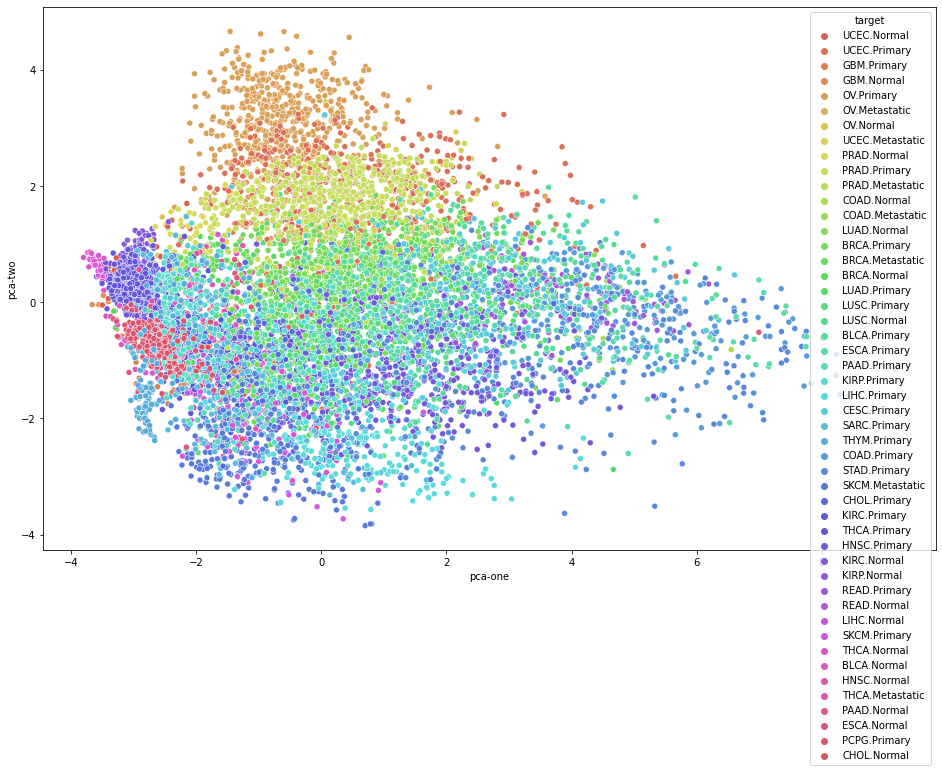

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=pd.Series(labels),
    palette=sns.color_palette("hls", pd.Series(labels).nunique()),
    data=data_xg_tsne.loc[rndperm,:],
    legend="full",
    alpha=1
)

## T-SNE

In [19]:
data_xg_tsne_copy = data_xg_tsne.copy()
data_xg_tsne_copy.drop('target', axis = 1, inplace = True)

In [20]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_xg_tsne_copy)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9303 samples in 9.746s...
[t-SNE] Computed neighbors for 9303 samples in 541.846s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9303
[t-SNE] Computed conditional probabilities for sample 2000 / 9303
[t-SNE] Computed conditional probabilities for sample 3000 / 9303
[t-SNE] Computed conditional probabilities for sample 4000 / 9303
[t-SNE] Computed conditional probabilities for sample 5000 / 9303
[t-SNE] Computed conditional probabilities for sample 6000 / 9303
[t-SNE] Computed conditional probabilities for sample 7000 / 9303
[t-SNE] Computed conditional probabilities for sample 8000 / 9303
[t-SNE] Computed conditional probabilities for sample 9000 / 9303
[t-SNE] Computed conditional probabilities for sample 9303 / 9303
[t-SNE] Mean sigma: 1.300847
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.704865
[t-SNE] KL divergence after 300 iterations: 2.214979
t-SNE done! Time elapsed: 580.374778

In [42]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_xg_tsne_copy)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9303 samples in 9.847s...
[t-SNE] Computed neighbors for 9303 samples in 191.790s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9303
[t-SNE] Computed conditional probabilities for sample 2000 / 9303
[t-SNE] Computed conditional probabilities for sample 3000 / 9303
[t-SNE] Computed conditional probabilities for sample 4000 / 9303
[t-SNE] Computed conditional probabilities for sample 5000 / 9303
[t-SNE] Computed conditional probabilities for sample 6000 / 9303
[t-SNE] Computed conditional probabilities for sample 7000 / 9303
[t-SNE] Computed conditional probabilities for sample 8000 / 9303
[t-SNE] Computed conditional probabilities for sample 9000 / 9303
[t-SNE] Computed conditional probabilities for sample 9303 / 9303
[t-SNE] Mean sigma: 1.431982
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.826157
[t-SNE] KL divergence after 300 iterations: 1.751115
t-SNE done! Time elapsed: 345.919875

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

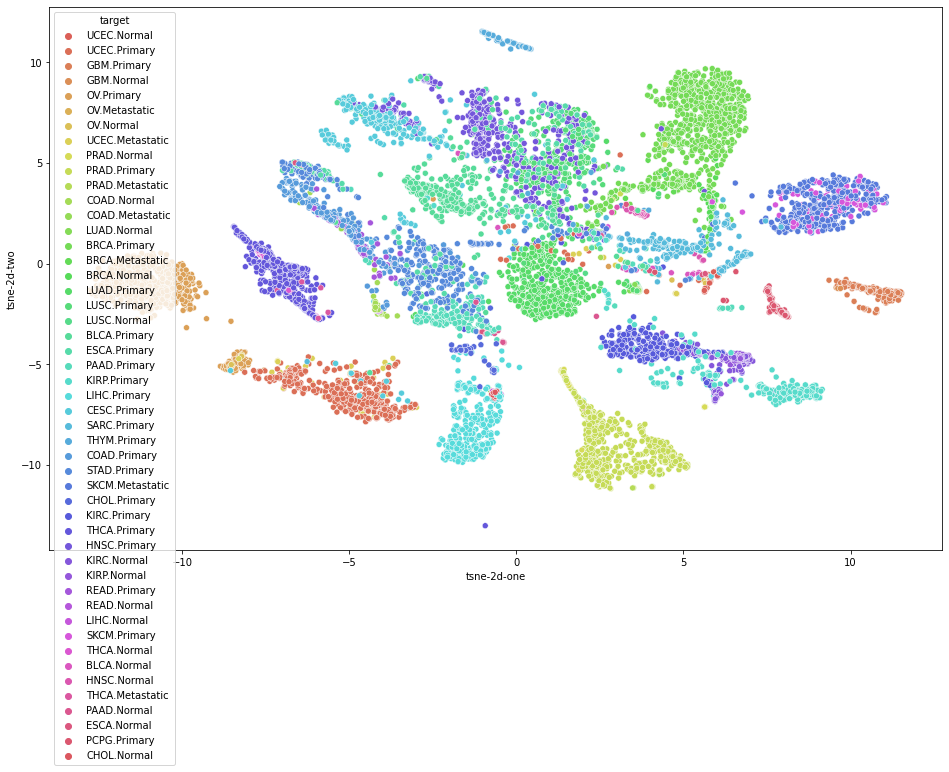

In [21]:
data_xg_tsne_copy['tsne-2d-one'] = tsne_results[:,0]
data_xg_tsne_copy['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=pd.Series(labels),
    palette=sns.color_palette("hls", pd.Series(labels).nunique()),
    data=data_xg_tsne_copy,
    legend="full",
    alpha=1
)

AttributeError: 'PathCollection' object has no property 'z'

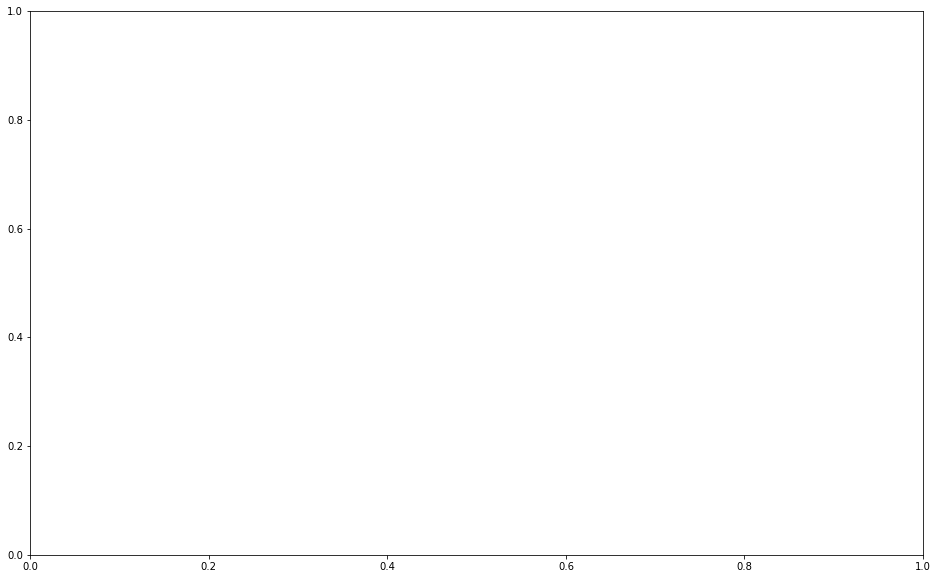

In [44]:
data_xg_tsne_copy['tsne-2d-one'] = tsne_results[:,0]
data_xg_tsne_copy['tsne-2d-two'] = tsne_results[:,1]
data_xg_tsne_copy['tsne-2d-three'] = tsne_results[:,2]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two", z = "tsne-2d-three",
    hue=pd.Series(labels),
    palette=sns.color_palette("hls", pd.Series(labels).nunique()),
    data=data_xg_tsne_copy,
    legend="full",
    alpha=1
)

In [45]:
short_tsne = data_xg_tsne_copy.iloc[:, [-3, -2, -1]]
short_tsne

,tsne-2d-one,tsne-2d-two,tsne-2d-three
0,5.121835,-0.890076,4.541687
1,5.104440,-0.864654,4.554698
2,5.129231,-0.904545,4.535842
3,5.104467,-0.839658,4.559324
4,5.146556,-0.870340,4.549135
...,...,...,...
9298,2.677320,1.032861,-7.406755
9299,5.048071,3.016867,-4.087641
9300,1.084147,-2.363334,0.862466
9301,0.298734,0.625691,-5.965405


ord_enc = OrdinalEncoder()
data_xg["labels"] = ord_enc.fit_transform(data_xg[["target"]])
data_xg['labels'] = data_xg['labels'].astype(int)
data_xg[["target", "labels"]].tail(5)

In [46]:
#X1 = data_xg.iloc[:, :-1].values
y1 = data_xg_tsne.iloc[:, -4].values

In [47]:
y1

array(['UCEC.Normal', 'UCEC.Normal', 'UCEC.Normal', ..., 'CHOL.Primary',
       'CHOL.Normal', 'CESC.Primary'], dtype=object)

In [52]:
flag = True
while flag:
    X_train1, X_test1, y_train1, y_test1 = train_test_split(short_tsne, y1, test_size = 0.20, shuffle=True)
    if (pd.Series(y_test1).nunique() == pd.Series(y_train1).nunique()):
            flag = False

In [53]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train1 = feature_scaler.fit_transform(X_train1)
X_test1 = feature_scaler.transform(X_test1)

In [50]:
# defining parameter range 
param_grid = {'max_depth': [3, 4, 5], 
            'n_estimators': [10, 50, 100, 500]} 
        
grid = GridSearchCV(XGBClassifier(), param_grid, scoring='accuracy',
                     cv=5, refit = True, verbose = 3, n_jobs=-1) 

# fitting the model for grid search 
grid.fit(X_train1, y_train1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
exception calling callback for <Future at 0x28bc2b0af70 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\shakshi\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\shakshi\Anaconda3\lib\multiprocessing\queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "C:\Users\shakshi\Anaconda3\lib\site-packages\xgboost\__init__.py", line 9, in <module>
    from .core import DMatrix, DeviceQuantileDMatrix, Booster
  File "C:\Users\shakshi

KeyboardInterrupt: 

In [ ]:
print(grid.best_params_)

In [54]:
folds = KFold(5,shuffle = True, random_state=0)
classifier = XGBClassifier(random_state = 42)

In [55]:
for i, (train, test) in enumerate(folds.split(X_train1, y_train1)):

    classifier.fit(X_train1[train], y_train1[train])
    
    y_pred = classifier.predict(X_train1[test]) 
    conf_mat = confusion_matrix(y_train1[test], y_pred)
    print (conf_mat)

    precision = precision_score(y_train1[test], y_pred, average='micro')
    print('Precision micro: %.3f' % precision)
    precision = precision_score(y_train1[test], y_pred, average='macro')
    print('Precision macro: %.3f' % precision)
    recall = recall_score(y_train1[test], y_pred, average='micro')
    print('Recall micro: %.3f' % recall)
    recall = recall_score(y_train1[test], y_pred, average='macro')
    print('Recall macro: %.3f' % recall)
    print(accuracy_score(y_train1[test], y_pred))
    print(classification_report(y_train1[test], y_pred))

C:\Users\shakshi\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 1  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0 11]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  1  2 56]]
Precision micro: 0.813
Precision macro: 0.616
Recall micro: 0.813
Recall macro: 0.586
0.8126259234385493
                 precision    recall  f1-score   support

    BLCA.Normal       1.00      0.50      0.67         2
   BLCA.Primary       0.81      0.81      0.81        63
BRCA.Metastatic       0.00      0.00      0.00         3
    BRCA.Normal       0.85      0.73      0.79        15
   BRCA.Primary       0.93      0.98      0.96       125
   CESC.Primary       0.79      0.83      0.81        41
    CHOL.Normal       0.33  

C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:122

[00:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 3  1  0 ...  0  0  0]
 [ 1 55  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  3]
 [ 0  0  0 ...  0  5  3]
 [ 0  3  0 ...  3  1 73]]
Precision micro: 0.835
Precision macro: 0.646
Recall micro: 0.835
Recall macro: 0.614
0.8347884486232371
                 precision    recall  f1-score   support

    BLCA.Normal       0.60      0.75      0.67         4
   BLCA.Primary       0.86      0.80      0.83        69
BRCA.Metastatic       0.00      0.00      0.00         1
    BRCA.Normal       1.00      0.60      0.75        10
   BRCA.Primary       0.96      0.99      0.97       135
   CESC.Primary       0.91      0.86      0.88        58
    CHOL.Normal       0.50  

[00:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 1  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  9]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  3  0 65]]
Precision micro: 0.832
Precision macro: 0.611
Recall micro: 0.832
Recall macro: 0.592
0.831989247311828
                 precision    recall  f1-score   support

    BLCA.Normal       1.00      0.33      0.50         3
   BLCA.Primary       0.88      0.85      0.86        75
BRCA.Metastatic       0.00      0.00      0.00         0
    BRCA.Normal       0.83      0.71      0.77         7
   BRCA.Primary       0.97      0.98      0.98       110
   CESC.Primary       0.83      0.80      0.82        50
    CHOL.Normal       0.00   

In [56]:
y_pred_cv = classifier.predict(X_test1)
print(classification_report(y_test1, y_pred_cv))

                 precision    recall  f1-score   support

    BLCA.Normal       0.38      0.60      0.46         5
   BLCA.Primary       0.88      0.78      0.83        78
BRCA.Metastatic       0.00      0.00      0.00         5
    BRCA.Normal       0.84      1.00      0.91        21
   BRCA.Primary       0.92      0.96      0.94       165
   CESC.Primary       0.80      0.78      0.79        60
    CHOL.Normal       0.00      0.00      0.00         1
   CHOL.Primary       1.00      0.46      0.63        13
COAD.Metastatic       0.00      0.00      0.00         3
    COAD.Normal       0.88      0.47      0.61        15
   COAD.Primary       0.68      0.76      0.72        58
    ESCA.Normal       0.50      0.50      0.50         2
   ESCA.Primary       0.43      0.29      0.34        35
     GBM.Normal       1.00      1.00      1.00         1
    GBM.Primary       1.00      1.00      1.00        34
    HNSC.Normal       1.00      0.85      0.92        13
   HNSC.Primary       0.81    

In [57]:
roc_auc_score(y_test1, classifier.predict_proba(X_test1), multi_class='ovr')

0.9860428722825159

In [58]:
precision_score(y_test1, y_pred_cv, average='micro')

0.8285867813003761

In [59]:
recall_score(y_test1, y_pred_cv, average='micro')

0.8285867813003761

In [60]:
f1_score(y_test1, y_pred_cv, average='micro')

0.8285867813003761

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

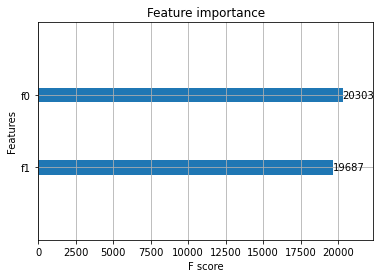

In [35]:
xgb.plot_importance(classifier)

# LIME

In [37]:
training_columns = data_xg_tsne.iloc[:, -4]

In [ ]:
training_columns.columns

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train1),
    feature_names=training_columns.columns,
    class_names=list(np.unique(labels)),
    mode='classification'
)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test1[1], 
    predict_fn=classifier.predict_proba, num_features=10, top_labels=2
)

exp.show_in_notebook(show_table=True)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test1[2], 
    predict_fn=classifier.predict_proba, num_features=10, top_labels=2
)

exp.show_in_notebook(show_table=True)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test1[20], 
    predict_fn=classifier.predict_proba, num_features=10, top_labels=2
)

exp.show_in_notebook(show_table=True)

In [159]:
print(y_test1[1])
print(y_pred[1])
print(y_test1[2])
print(y_pred[2])

print(y_test1[20])
print(y_pred[20])

ESCA.Primary
ESCA.Primary
KIRC.Primary
OV.Primary
SKCM.Metastatic
KIRC.Normal


## SHAP

In [36]:
import shap

In [55]:
df = data_xg.copy()

In [56]:
ord_enc = OrdinalEncoder()
df["labels"] = ord_enc.fit_transform(df[["target"]])
df['labels'] = df['labels'].astype(int)

In [57]:
df.drop('target', axis = 1, inplace = True)
df

,cg00002426,cg00003994,cg00005847,cg00007981,cg00008493,cg00008713,cg00009407,cg00011459,cg00012199,cg00012386,...,cg06186808,cg06200697,cg06274159,cg06320982,cg06334284,cg06403553,cg06654134,cg06779945,cg06806080,labels
0,0.436050,0.074984,0.893554,0.026659,0.900775,0.075170,0.032180,0.907548,0.037331,0.037113,...,0.795657,0.265349,0.097189,0.076978,0.029318,0.942113,0.020709,0.026417,0.802901,47
1,0.448136,0.040227,0.919923,0.025979,0.914231,0.071295,0.035460,0.931793,0.036792,0.046211,...,0.815388,0.221601,0.060253,0.072997,0.030797,0.929402,0.028679,0.029687,0.740046,47
2,0.409466,0.050360,0.909398,0.024230,0.935521,0.065115,0.034236,0.906213,0.047656,0.043212,...,0.817406,0.235482,0.066371,0.063594,0.027764,0.953561,0.017919,0.031894,0.792316,47
3,0.437174,0.076287,0.858700,0.029286,0.918484,0.057078,0.037669,0.917991,0.034855,0.038150,...,0.779472,0.202336,0.088788,0.049972,0.038165,0.945963,0.026818,0.033895,0.755296,48
4,0.447186,0.083306,0.886190,0.027149,0.929991,0.086450,0.043569,0.923754,0.040866,0.038729,...,0.807666,0.266915,0.063300,0.060651,0.031231,0.954144,0.024967,0.034382,0.745931,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,0.260311,0.066188,0.512037,0.026463,0.952542,0.098548,0.033848,0.925793,0.035775,0.044707,...,0.757731,0.481846,0.081013,0.044266,0.029338,0.869177,0.035146,0.018033,0.790972,22
9299,0.648393,0.046773,0.220836,0.024113,0.895551,0.078428,0.035608,0.777949,0.037748,0.109160,...,0.758771,0.624036,0.091590,0.158040,0.020283,0.923744,0.031059,0.028374,0.652660,45
9300,0.596343,0.060194,0.382314,0.028023,0.937967,0.046913,0.032673,0.935719,0.054095,0.049599,...,0.839524,0.490146,0.430134,0.087489,0.024854,0.843199,0.033082,0.027194,0.779793,7
9301,0.525024,0.061355,0.163317,0.026504,0.879054,0.063628,0.037987,0.946712,0.037207,0.037207,...,0.521575,0.471292,0.084758,0.037118,0.032915,0.924528,0.039428,0.027978,0.669977,6


In [59]:
df = df.iloc[:,:-1]
l = df.iloc[:,-1]

In [65]:
df.columns

Index(['cg00002426', 'cg00003994', 'cg00005847', 'cg00007981', 'cg00008493',
       'cg00008713', 'cg00009407', 'cg00011459', 'cg00012199', 'cg00012386',
       ...
       'cg06154570', 'cg06186808', 'cg06200697', 'cg06274159', 'cg06320982',
       'cg06334284', 'cg06403553', 'cg06654134', 'cg06779945', 'cg06806080'],
      dtype='object', length=2978)

In [77]:
df.loc[features.index]

,cg00002426,cg00003994,cg00005847,cg00007981,cg00008493,cg00008713,cg00009407,cg00011459,cg00012199,cg00012386,...,cg06154570,cg06186808,cg06200697,cg06274159,cg06320982,cg06334284,cg06403553,cg06654134,cg06779945,cg06806080
0,0.436050,0.074984,0.893554,0.026659,0.900775,0.075170,0.032180,0.907548,0.037331,0.037113,...,0.353745,0.795657,0.265349,0.097189,0.076978,0.029318,0.942113,0.020709,0.026417,0.802901
1,0.448136,0.040227,0.919923,0.025979,0.914231,0.071295,0.035460,0.931793,0.036792,0.046211,...,0.348272,0.815388,0.221601,0.060253,0.072997,0.030797,0.929402,0.028679,0.029687,0.740046
2,0.409466,0.050360,0.909398,0.024230,0.935521,0.065115,0.034236,0.906213,0.047656,0.043212,...,0.376057,0.817406,0.235482,0.066371,0.063594,0.027764,0.953561,0.017919,0.031894,0.792316
3,0.437174,0.076287,0.858700,0.029286,0.918484,0.057078,0.037669,0.917991,0.034855,0.038150,...,0.366986,0.779472,0.202336,0.088788,0.049972,0.038165,0.945963,0.026818,0.033895,0.755296
4,0.447186,0.083306,0.886190,0.027149,0.929991,0.086450,0.043569,0.923754,0.040866,0.038729,...,0.436988,0.807666,0.266915,0.063300,0.060651,0.031231,0.954144,0.024967,0.034382,0.745931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.761785,0.057061,0.460578,0.019890,0.936388,0.051141,0.027332,0.910511,0.048301,0.040045,...,0.205219,0.788002,0.258390,0.107879,0.061274,0.031366,0.873533,0.037747,0.026963,0.813459
96,0.315412,0.159052,0.665213,0.028231,0.945226,0.063458,0.035885,0.926188,0.052682,0.029441,...,0.294967,0.865290,0.199365,0.116361,0.048594,0.025479,0.764798,0.022270,0.024192,0.390439
97,0.678333,0.080935,0.462340,0.019085,0.909757,0.057451,0.025842,0.906343,0.047779,0.029633,...,0.216717,0.891938,0.530464,0.127538,0.064079,0.029973,0.453519,0.025765,0.020215,0.844593
98,0.759114,0.072493,0.660160,0.027159,0.936594,0.057064,0.034235,0.933781,0.051137,0.035029,...,0.193841,0.903758,0.626354,0.156869,0.063211,0.029791,0.912335,0.024551,0.025589,0.851419


In [75]:
X_test_shap = pd.DataFrame(X_test1, columns = df.columns)

In [110]:
X_test_shap

,cg00002426,cg00003994,cg00005847,cg00007981,cg00008493,cg00008713,cg00009407,cg00011459,cg00012199,cg00012386,...,cg06154570,cg06186808,cg06200697,cg06274159,cg06320982,cg06334284,cg06403553,cg06654134,cg06779945,cg06806080
0,-0.219739,-0.741753,0.785065,-0.440163,0.320779,0.409571,-0.644231,-0.009931,0.157810,0.433442,...,-0.960272,-0.449532,-0.638702,1.214002,0.437699,1.048708,0.586933,-0.605660,-0.424858,-1.694902
1,0.509076,0.697986,0.262785,-0.814227,0.311485,-0.483809,0.378687,0.202858,0.237914,0.534236,...,-0.973729,0.411563,-0.963330,0.544566,0.291128,-0.079031,-0.989340,2.712554,0.161925,0.550499
2,0.555402,0.424264,0.903812,-0.096478,0.654737,0.536638,1.302640,0.206877,0.240333,0.825516,...,1.001105,0.181718,0.841886,-1.208633,-0.536385,-0.187529,0.313887,-0.198143,0.344365,0.301134
3,-0.527287,-0.454820,-0.662901,-0.515401,0.367141,-0.631246,-0.241108,0.265408,0.048449,-0.408654,...,1.109854,0.110645,-0.519579,-0.873030,-0.418134,-0.037254,0.692374,-0.310969,0.043350,-0.188754
4,-0.260416,3.126783,0.979721,-0.100119,0.720293,0.379727,0.242637,0.534928,-0.073242,-0.054863,...,-1.234464,0.896977,-0.671065,1.071516,0.267570,-0.164531,0.697977,-0.209441,-0.686357,-2.067169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,-0.462735,-0.766136,0.608838,-0.074722,0.159878,-0.599216,0.035146,0.151969,-0.155790,-0.308699,...,-1.061806,0.121223,-0.709124,0.825198,1.694397,-0.311198,-0.335886,-0.624665,-1.167352,0.377154
1857,0.525161,-0.113264,1.164732,-0.197293,0.458766,0.300118,-0.509064,0.571850,-0.191427,-0.961479,...,-1.623931,1.172955,1.339028,0.984570,-0.853923,-0.570635,0.617633,0.204779,0.326903,1.129366
1858,-0.302982,-0.038067,1.516737,-0.182640,0.716405,-0.319949,-0.383085,-0.013641,0.312407,-0.957046,...,-0.242316,1.235637,-1.592239,0.988745,-0.738069,-0.798513,0.615913,0.060781,-0.972986,1.119047
1859,-0.044230,-0.441985,1.041564,-0.115296,0.274538,0.662525,-0.260566,-0.172387,-0.084881,-0.139742,...,-0.371164,0.714899,-0.195833,1.079709,0.260584,-0.242320,0.732933,-0.213224,-0.709390,0.827531


In [109]:
X_test_shap.shape

(1861, 2978)

In [92]:
X_test_shap.iloc[select]

,cg00002426,cg00003994,cg00005847,cg00007981,cg00008493,cg00008713,cg00009407,cg00011459,cg00012199,cg00012386,...,cg06154570,cg06186808,cg06200697,cg06274159,cg06320982,cg06334284,cg06403553,cg06654134,cg06779945,cg06806080
0,-0.219739,-0.741753,0.785065,-0.440163,0.320779,0.409571,-0.644231,-0.009931,0.157810,0.433442,...,-0.960272,-0.449532,-0.638702,1.214002,0.437699,1.048708,0.586933,-0.605660,-0.424858,-1.694902
1,0.509076,0.697986,0.262785,-0.814227,0.311485,-0.483809,0.378687,0.202858,0.237914,0.534236,...,-0.973729,0.411563,-0.963330,0.544566,0.291128,-0.079031,-0.989340,2.712554,0.161925,0.550499
2,0.555402,0.424264,0.903812,-0.096478,0.654737,0.536638,1.302640,0.206877,0.240333,0.825516,...,1.001105,0.181718,0.841886,-1.208633,-0.536385,-0.187529,0.313887,-0.198143,0.344365,0.301134
3,-0.527287,-0.454820,-0.662901,-0.515401,0.367141,-0.631246,-0.241108,0.265408,0.048449,-0.408654,...,1.109854,0.110645,-0.519579,-0.873030,-0.418134,-0.037254,0.692374,-0.310969,0.043350,-0.188754
4,-0.260416,3.126783,0.979721,-0.100119,0.720293,0.379727,0.242637,0.534928,-0.073242,-0.054863,...,-1.234464,0.896977,-0.671065,1.071516,0.267570,-0.164531,0.697977,-0.209441,-0.686357,-2.067169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.695012,0.631660,0.521319,0.159229,-0.823623,-0.319172,-0.908382,0.108697,-0.048084,-0.170061,...,0.667362,-1.052136,0.972180,-1.234482,0.533062,-0.381721,0.444361,-0.407131,-1.158827,0.009627
96,2.055186,-0.540936,-0.437503,0.521001,-0.106359,-0.633573,0.047679,0.234193,-0.161075,-0.801255,...,0.434686,0.738628,0.726228,0.083223,0.496688,1.828775,0.090089,-0.137737,0.432578,0.558623
97,0.100250,-0.711811,0.097283,-0.113148,0.328412,0.033031,0.093697,0.641423,-0.239291,-0.196080,...,-0.754474,0.410090,-0.391993,-0.836683,-0.036503,-0.110637,0.636720,-0.418642,0.375483,0.231606
98,0.208935,-0.495928,0.691627,-0.206403,0.242003,-0.226550,-0.699463,0.540685,0.049411,-0.220781,...,-0.039123,-0.832545,0.630507,-1.120135,-0.904328,-0.717612,0.589238,0.266728,0.912235,-1.042800


In [104]:
explainer = shap.TreeExplainer(classifier)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer Expected Value: {expected_value}")
idx = 10 # row selected for fast runtime
select = range(idx)
features = X_test_shap
feature_display = df.loc[features.index]
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

Explainer Expected Value: [-3.11781206e+00 -2.83162936e+00 -2.04070265e+00 -2.12122689e+00
 -1.77918221e+00 -1.47043842e+00 -1.22371984e+00 -1.00041971e+00
 -6.50559925e-01 -4.19733673e-01 -1.48541033e-01 -1.00591623e-03
  1.32245823e-01  7.11209663e-02  1.28441324e-01  1.68868373e-01
  1.93708499e-01  2.46809192e-01  2.31551011e-01  3.24223969e-01
  3.39294560e-01  3.22481709e-01  3.70648847e-01  3.48254904e-01
  3.62338142e-01  3.88704010e-01  3.96889983e-01  4.31859399e-01
  4.09264358e-01  4.27410823e-01  4.33176208e-01  4.37235287e-01
  4.48386960e-01  4.51523844e-01  4.56917035e-01  4.51655985e-01
  4.67492503e-01  4.72882571e-01  4.81312284e-01  4.82960230e-01
  4.85765555e-01  4.79430657e-01  5.00324874e-01  5.03612960e-01
  5.13696775e-01  5.05037799e-01  4.95864155e-01  4.94835489e-01
  5.08391100e-01]


XGBoostError: bad allocation

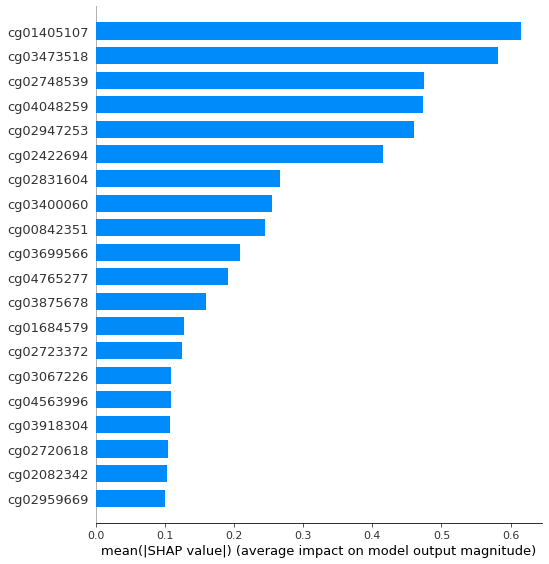

In [101]:
shap.summary_plot(shap_values, features, plot_type = 'bar')

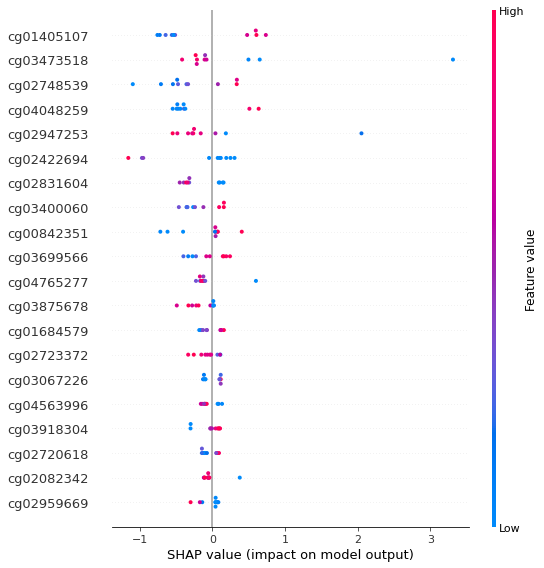

In [94]:
shap.summary_plot(shap_values, features)

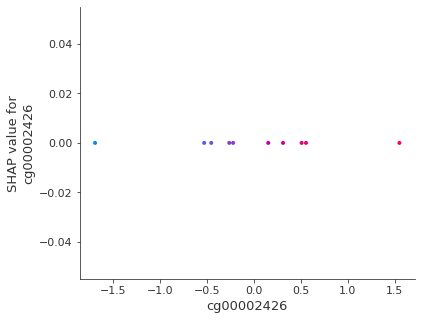

In [95]:
shap.dependence_plot(ind='cg00002426', interaction_index='cg00002426',
                    shap_values=shap_values, features=X_test1[:idx],
                    display_features=feature_display)

In [96]:
y_test1[1]

'ESCA.Primary'

In [97]:
y_pred[1]

'ESCA.Primary'

In [98]:
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value[1], shap_values=shap_values[1], features=feature_display.iloc[1,:])

In [108]:
X_test_shap.iloc[row]

cg00002426    0.509076
cg00003994    0.697986
cg00005847    0.262785
cg00007981   -0.814227
cg00008493    0.311485
                ...   
cg06334284   -0.079031
cg06403553   -0.989340
cg06654134    2.712554
cg06779945    0.161925
cg06806080    0.550499
Name: 1, Length: 2978, dtype: float64

In [111]:
row = 1
data_for_prediction = X_test_shap.iloc[row]  # use 1 arbitrary row of data
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(data_for_prediction_array)
#The shap_values is a list with two arrays. It’s cumbersome to review raw arrays, but the shap package has a nice way to visualize the results.

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [112]:
y_pred[1]

'ESCA.Primary'

In [128]:
class_names=list(np.unique(labels))
class_names

['BLCA.Normal',
 'BLCA.Primary',
 'BRCA.Metastatic',
 'BRCA.Normal',
 'BRCA.Primary',
 'CESC.Primary',
 'CHOL.Normal',
 'CHOL.Primary',
 'COAD.Metastatic',
 'COAD.Normal',
 'COAD.Primary',
 'ESCA.Normal',
 'ESCA.Primary',
 'GBM.Normal',
 'GBM.Primary',
 'HNSC.Normal',
 'HNSC.Primary',
 'KIRC.Normal',
 'KIRC.Primary',
 'KIRP.Normal',
 'KIRP.Primary',
 'LIHC.Normal',
 'LIHC.Primary',
 'LUAD.Normal',
 'LUAD.Primary',
 'LUSC.Normal',
 'LUSC.Primary',
 'OV.Metastatic',
 'OV.Normal',
 'OV.Primary',
 'PAAD.Normal',
 'PAAD.Primary',
 'PCPG.Primary',
 'PRAD.Metastatic',
 'PRAD.Normal',
 'PRAD.Primary',
 'READ.Normal',
 'READ.Primary',
 'SARC.Primary',
 'SKCM.Metastatic',
 'SKCM.Primary',
 'STAD.Primary',
 'THCA.Metastatic',
 'THCA.Normal',
 'THCA.Primary',
 'THYM.Primary',
 'UCEC.Metastatic',
 'UCEC.Normal',
 'UCEC.Primary']

In [122]:
explainer.expected_value[1]

1.9972498

In [123]:
shap_values[1]

array([[ 0.       ,  0.       , -0.0017725, ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)

In [113]:
shap.force_plot(explainer.expected_value[1], shap_values[1], feature_display)

Exception: Length of features is not equal to the length of shap_values!

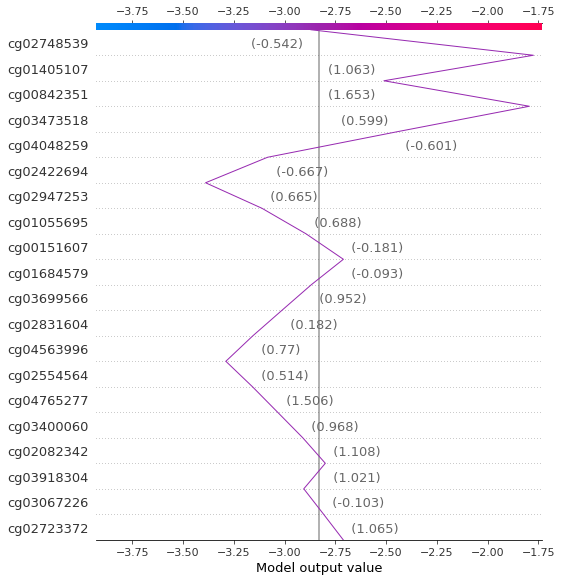

In [115]:
shap.decision_plot(expected_value[1], shap_values[1], features)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test1[1], 
    predict_fn=classifier.predict_proba, num_features=6 , labels=[0, 17]
)

#print('Predicted class =', labels[classifier.predict(X_test1[1]).reshape(1,-1)])
#print('True class: %s' % labels[y_test1[1]])

print ('Explanation for class %s' % labels[0])
print ('\n'.join(map(str, exp.as_list(label=0))))

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test1[1], 
    predict_fn=classifier.predict_proba, num_features=6 , labels=[50, 22]
)

#print('Predicted class =', labels[classifier.predict(X_test1[1]).reshape(1,-1)])
#print('True class: %s' % labels[y_test1[1]])

print ('Explanation for class %s' % labels[50])
print ('\n'.join(map(str, exp.as_list(label=50))))
print ()
print ('Explanation for class %s' % labels[22])
print ('\n'.join(map(str, exp.as_list(label=22))))